In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/tmp/ipykernel_19/316252808.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. 데이터셋 확인

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null data check

In [6]:
def showNullPct(df):
    for col in df.columns:
        msg = 'column: {:>10}\t Percent of NaN: {:.2f}%'.format(col, (df[col].isnull().sum() / df[col].shape[0])*100)
        print(msg)

In [7]:
showNullPct(df_train)

column: PassengerId	 Percent of NaN: 0.00%
column:   Survived	 Percent of NaN: 0.00%
column:     Pclass	 Percent of NaN: 0.00%
column:       Name	 Percent of NaN: 0.00%
column:        Sex	 Percent of NaN: 0.00%
column:        Age	 Percent of NaN: 19.87%
column:      SibSp	 Percent of NaN: 0.00%
column:      Parch	 Percent of NaN: 0.00%
column:     Ticket	 Percent of NaN: 0.00%
column:       Fare	 Percent of NaN: 0.00%
column:      Cabin	 Percent of NaN: 77.10%
column:   Embarked	 Percent of NaN: 0.22%


In [8]:
showNullPct(df_test)

column: PassengerId	 Percent of NaN: 0.00%
column:     Pclass	 Percent of NaN: 0.00%
column:       Name	 Percent of NaN: 0.00%
column:        Sex	 Percent of NaN: 0.00%
column:        Age	 Percent of NaN: 20.57%
column:      SibSp	 Percent of NaN: 0.00%
column:      Parch	 Percent of NaN: 0.00%
column:     Ticket	 Percent of NaN: 0.00%
column:       Fare	 Percent of NaN: 0.24%
column:      Cabin	 Percent of NaN: 78.23%
column:   Embarked	 Percent of NaN: 0.00%


<Axes: >

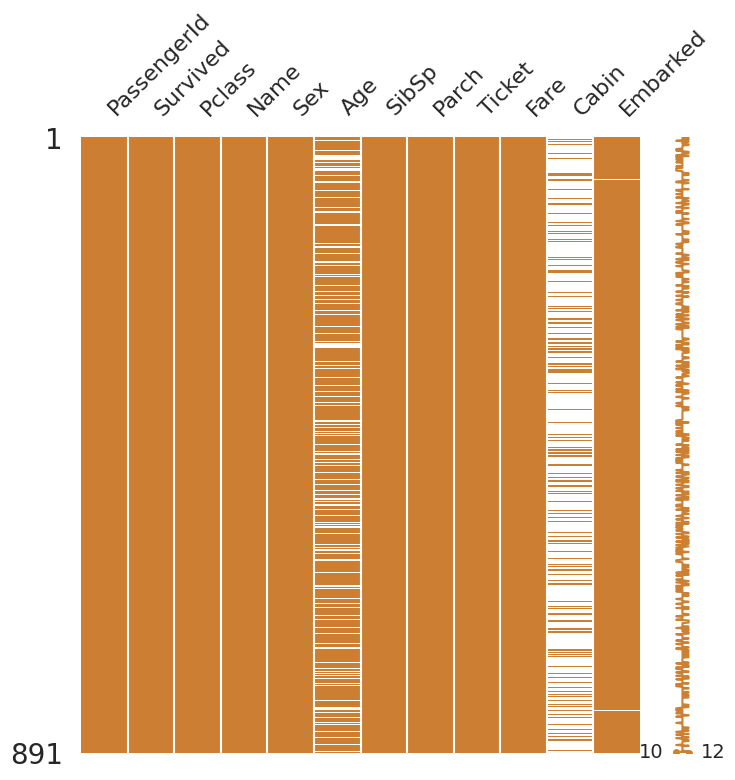

In [9]:
# missing data visualization

msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

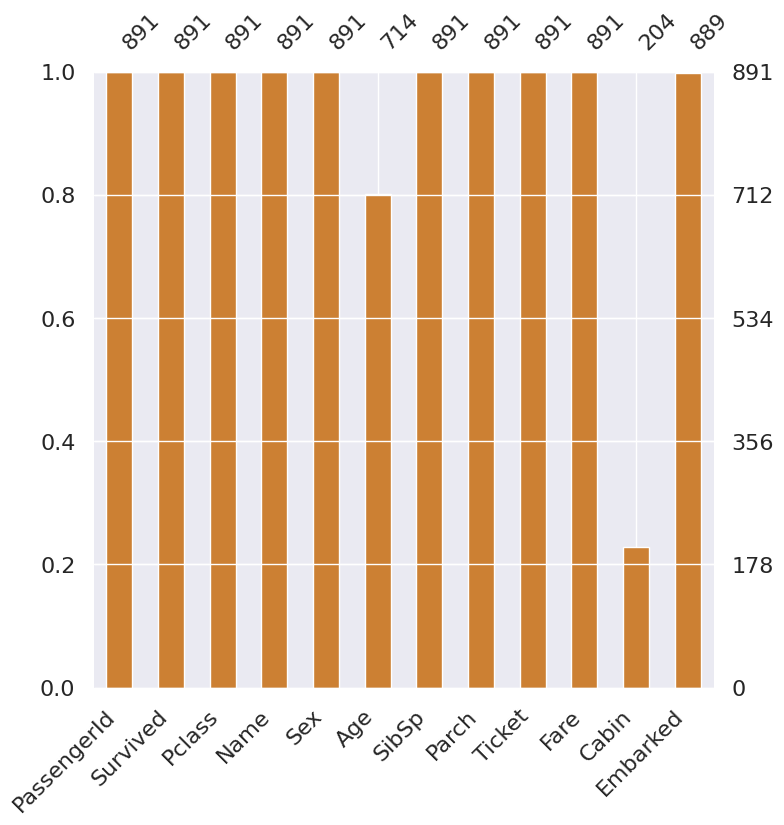

In [10]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

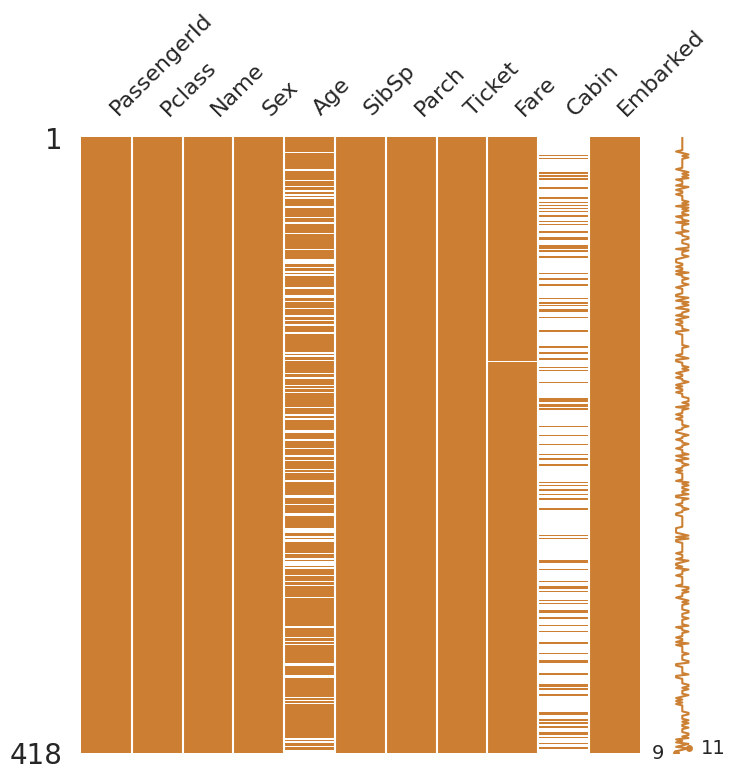

In [11]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

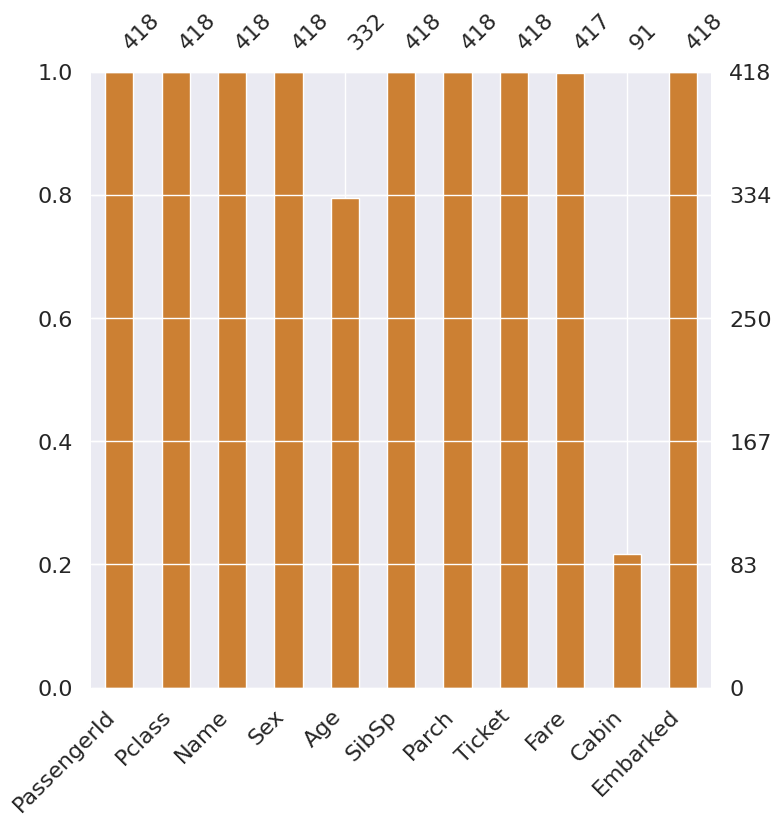

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target Label 확인
- 1과 0의 분포가 어떠하냐에 따라 모델의 평가 방법이 달라질 수 있음

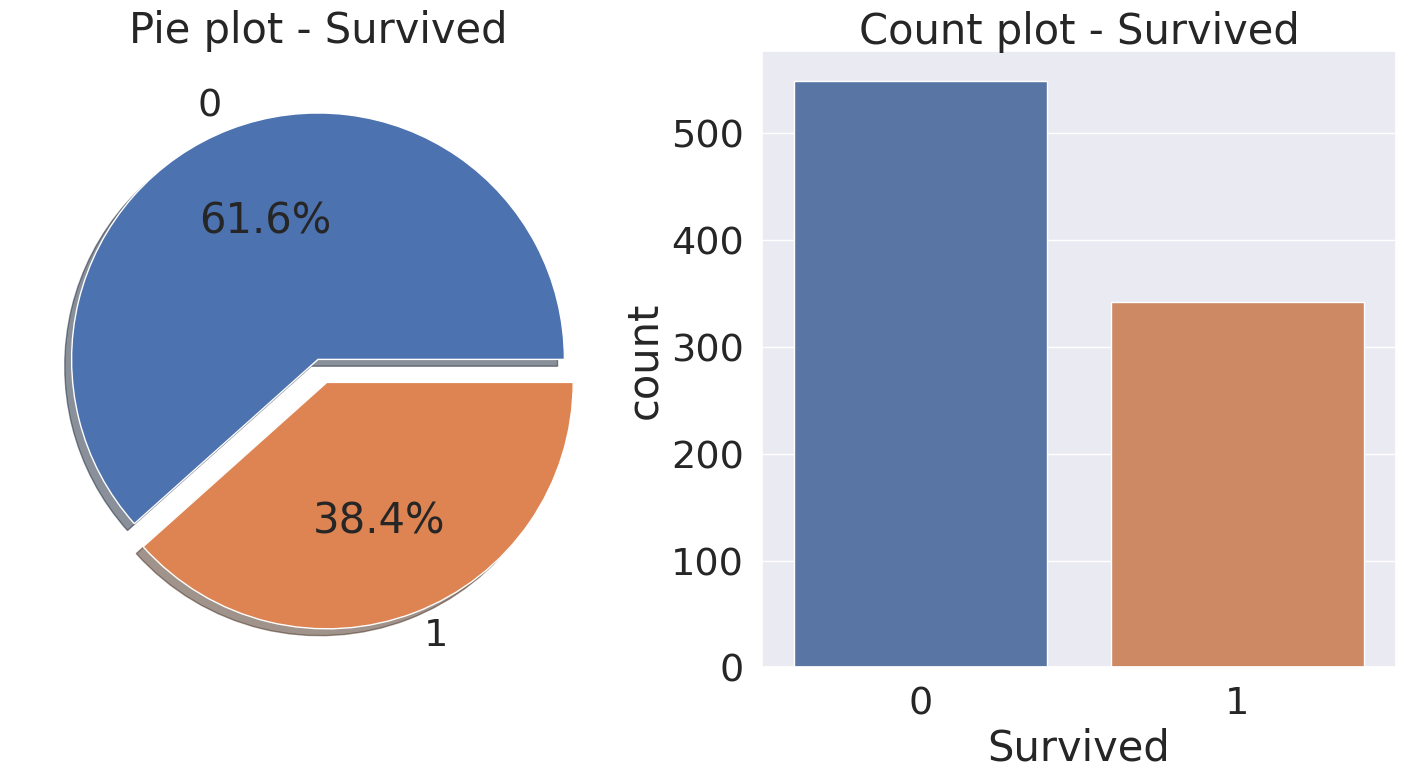

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show() 

# Exploratory data analysis

## 2.1 Pclass: ordinal data

In [14]:
# class 별 인원 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# class 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
# crosstab
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

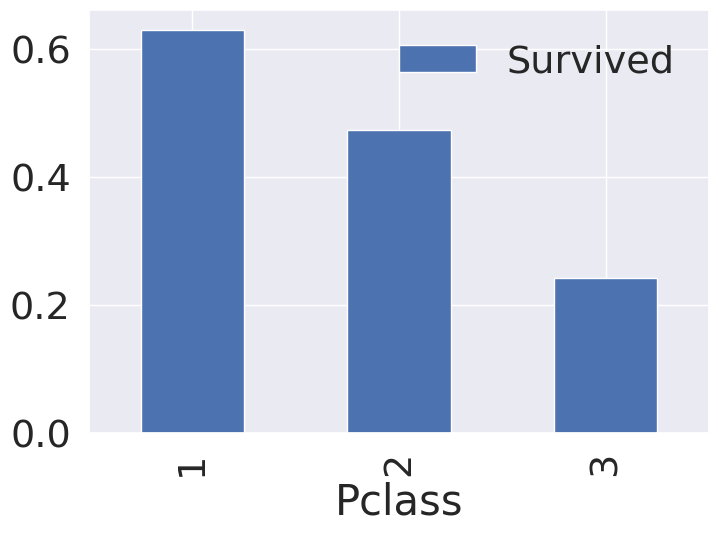

In [17]:
# class 별 생존율
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

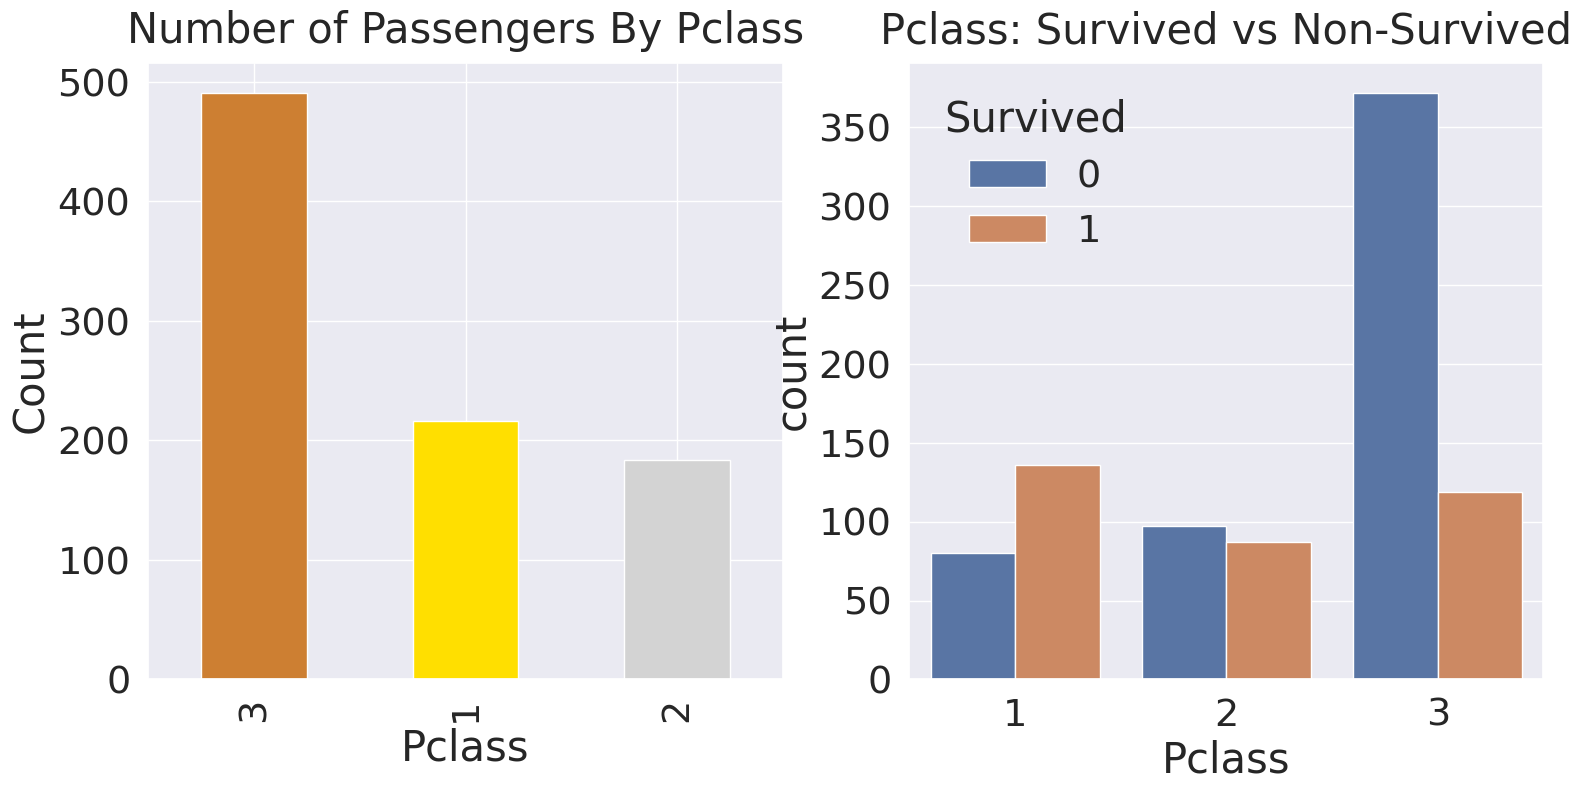

In [18]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Non-Survived', y = y_position)

plt.show() 

## 2.2 Sex

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


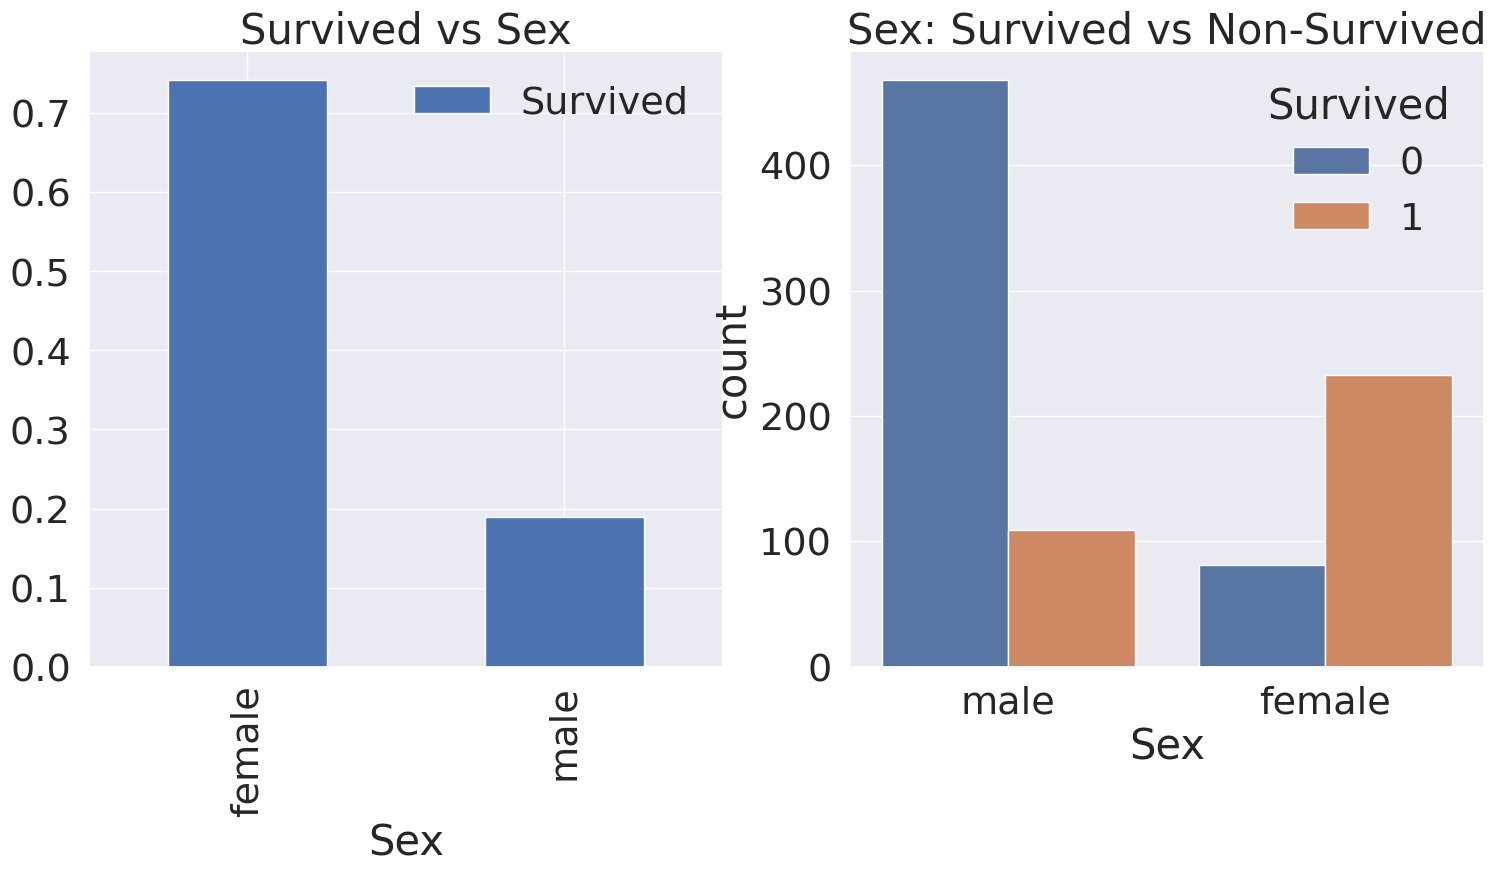

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Non-Survived')

plt.show() 

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
# crosstab
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

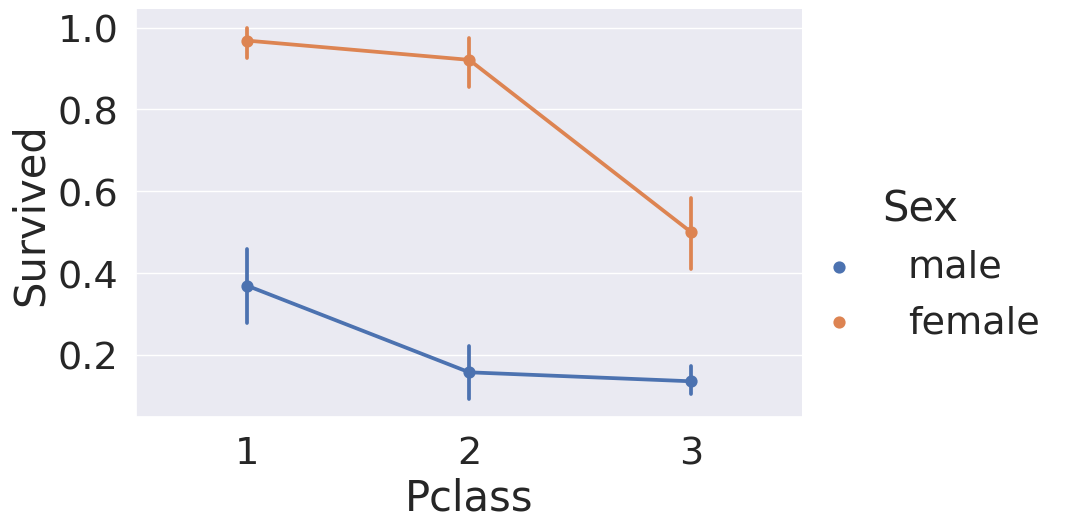

In [23]:
sns.catplot(x='Pclass', y='Survived', hue = 'Sex', kind='point', height=6, data=df_train, aspect=1.5)

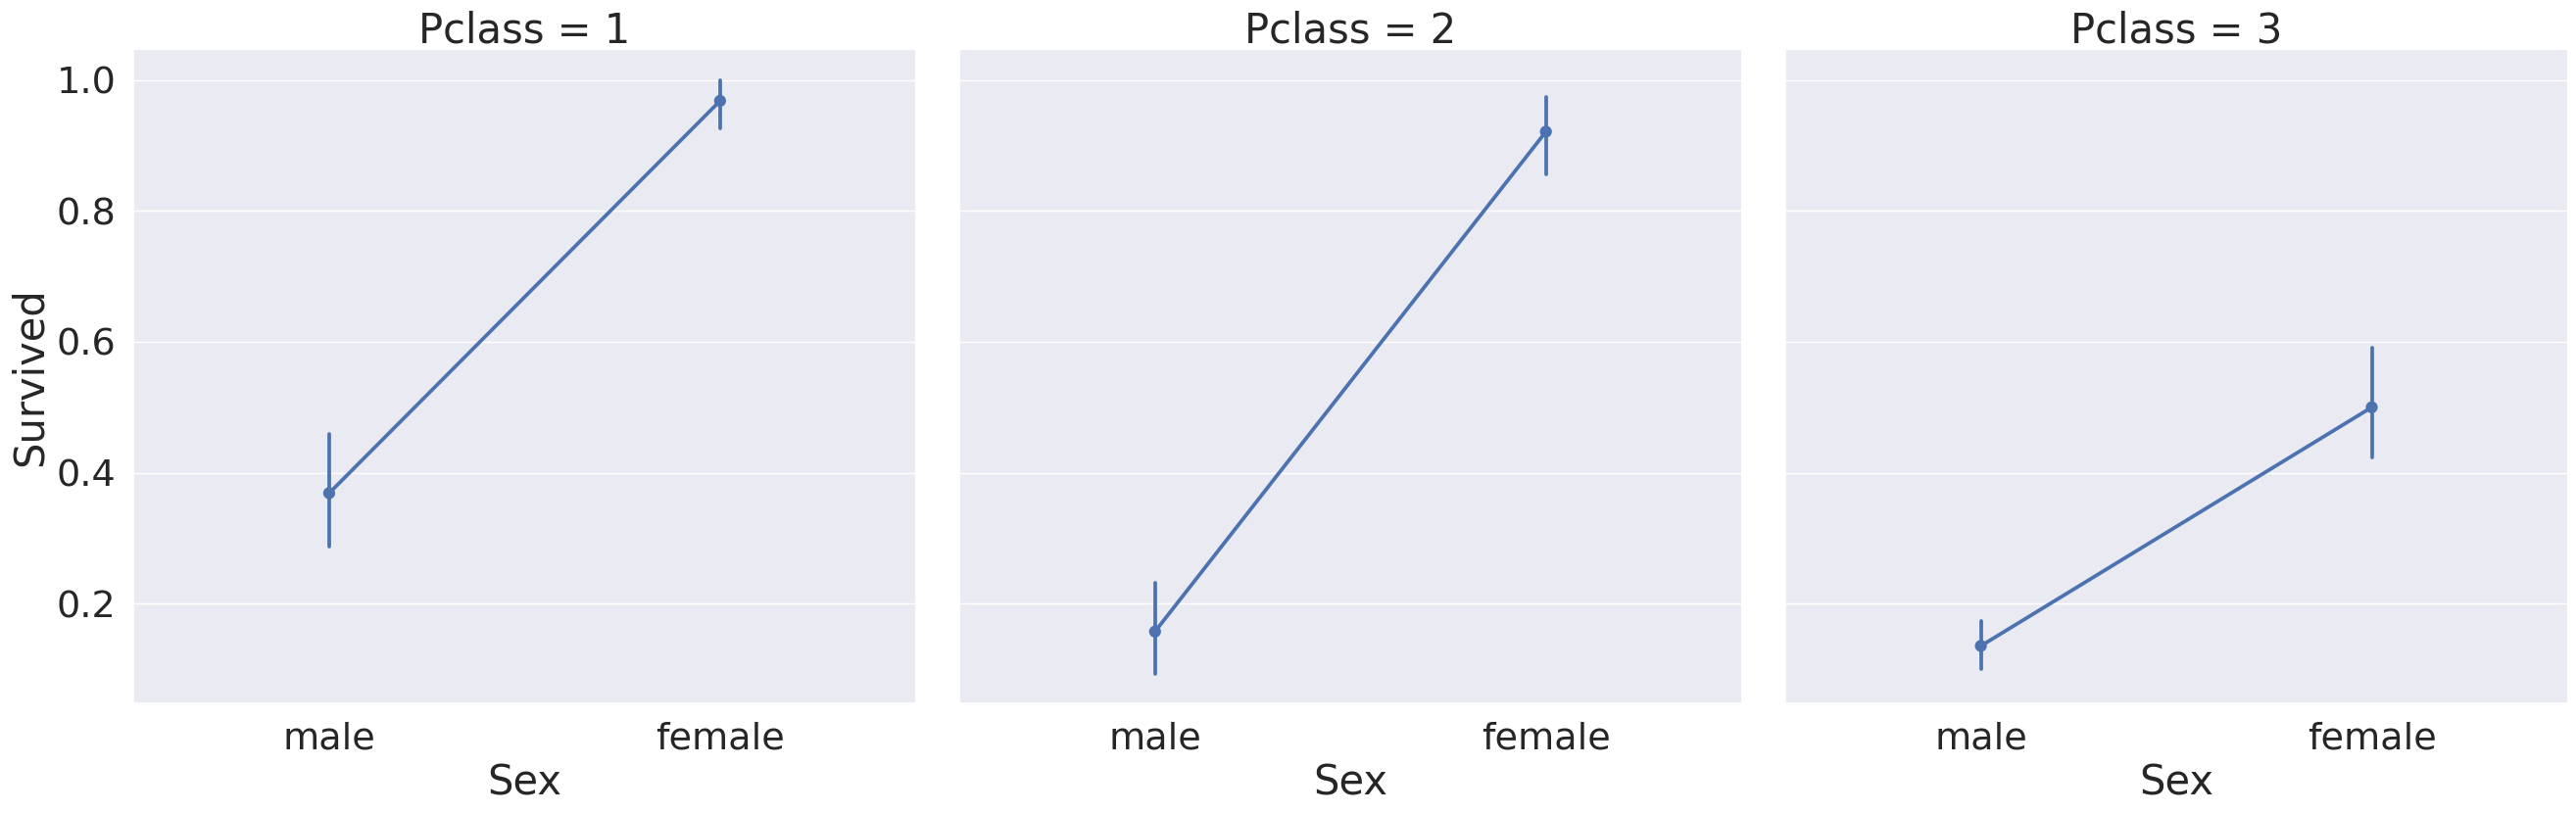

In [24]:
sns.catplot(x='Sex', y='Survived', col='Pclass', kind='point', data=df_train, height=9, aspect=1)

## 2.4 Age

In [25]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

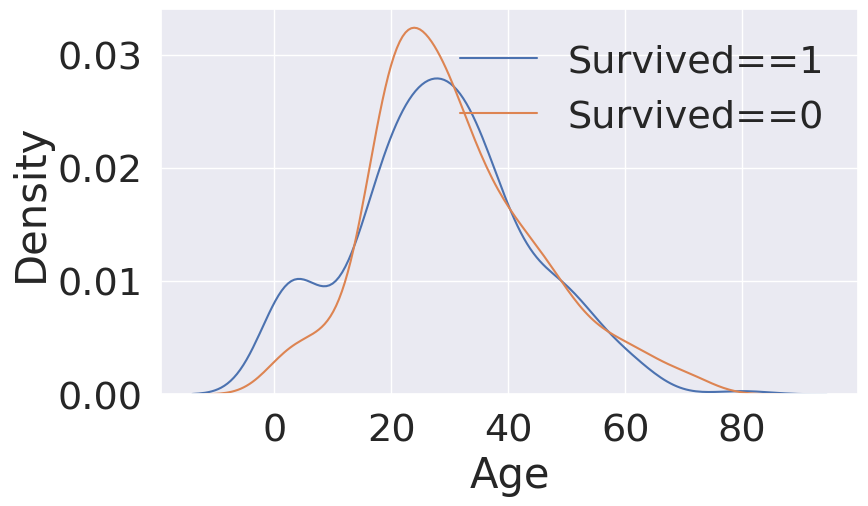

In [26]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

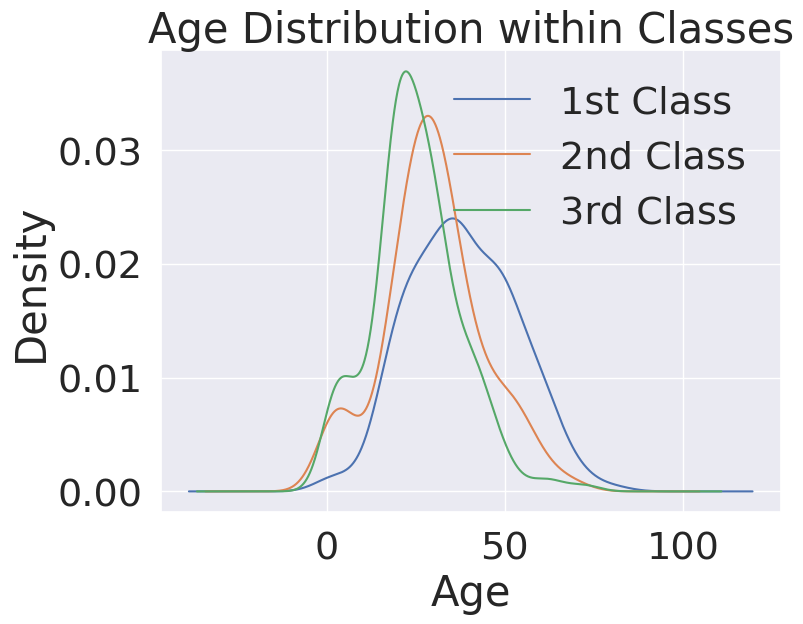

In [27]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [28]:
df_train[df_train['Age']<40]['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 551, dtype: int64

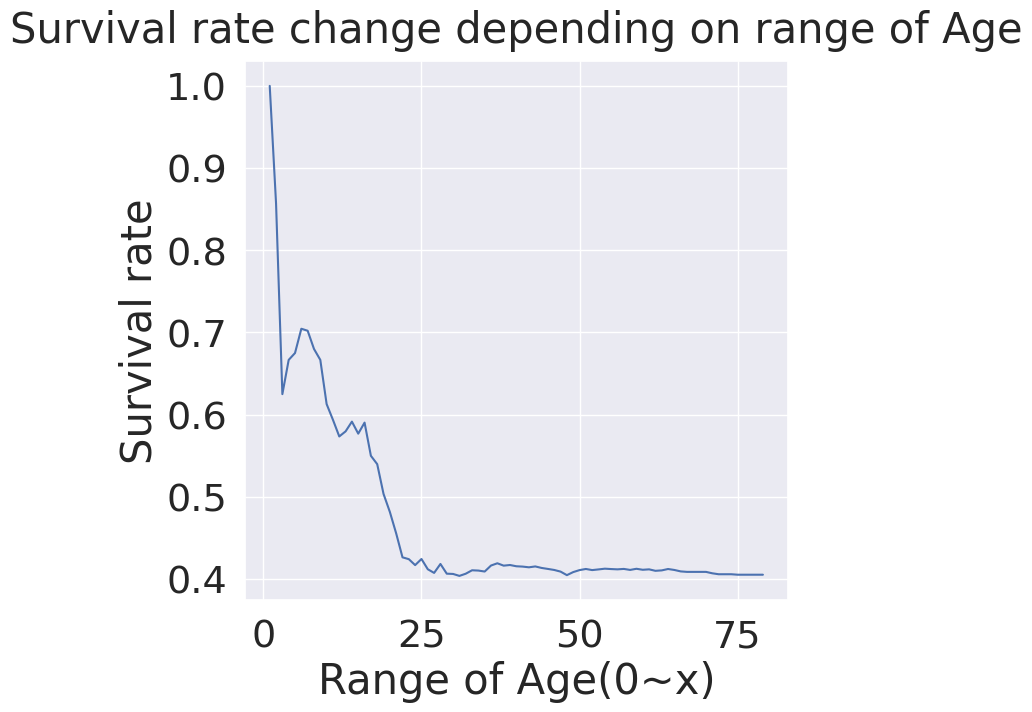

In [29]:
cum_survival_ratio = []

for i in range(80):
    cum_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cum_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 2.5 Pclass, Sex, Age

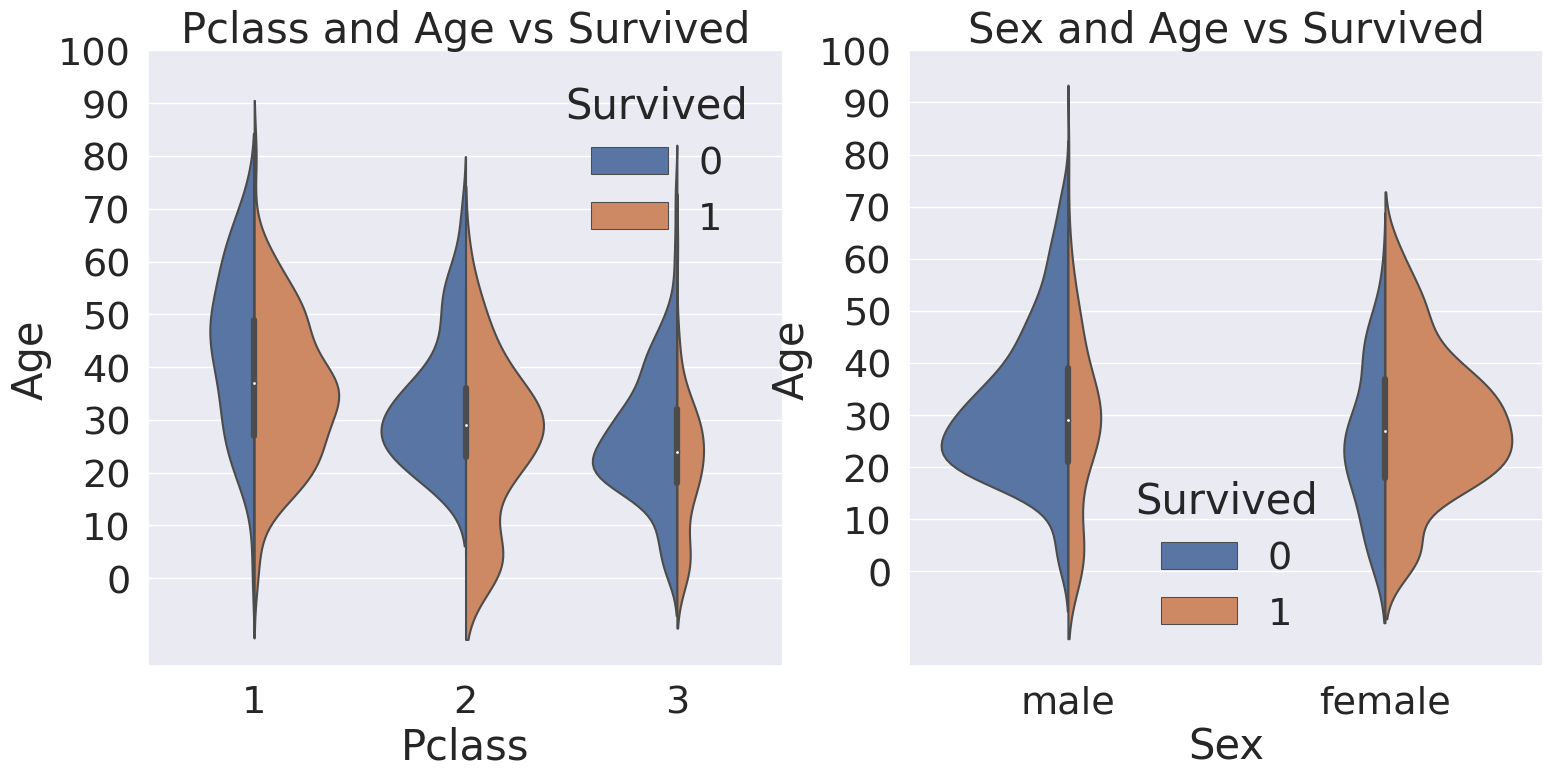

In [30]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived',data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived',data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 2.6 Embarked: nominal data

<Axes: xlabel='Embarked'>

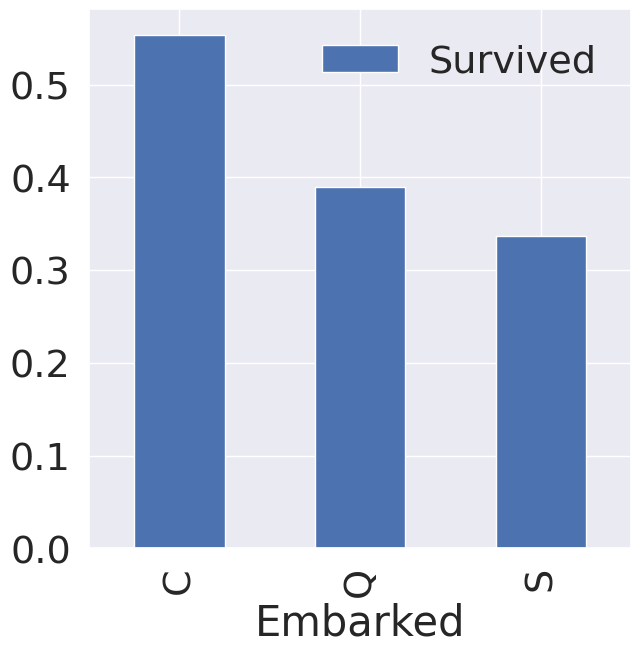

In [31]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

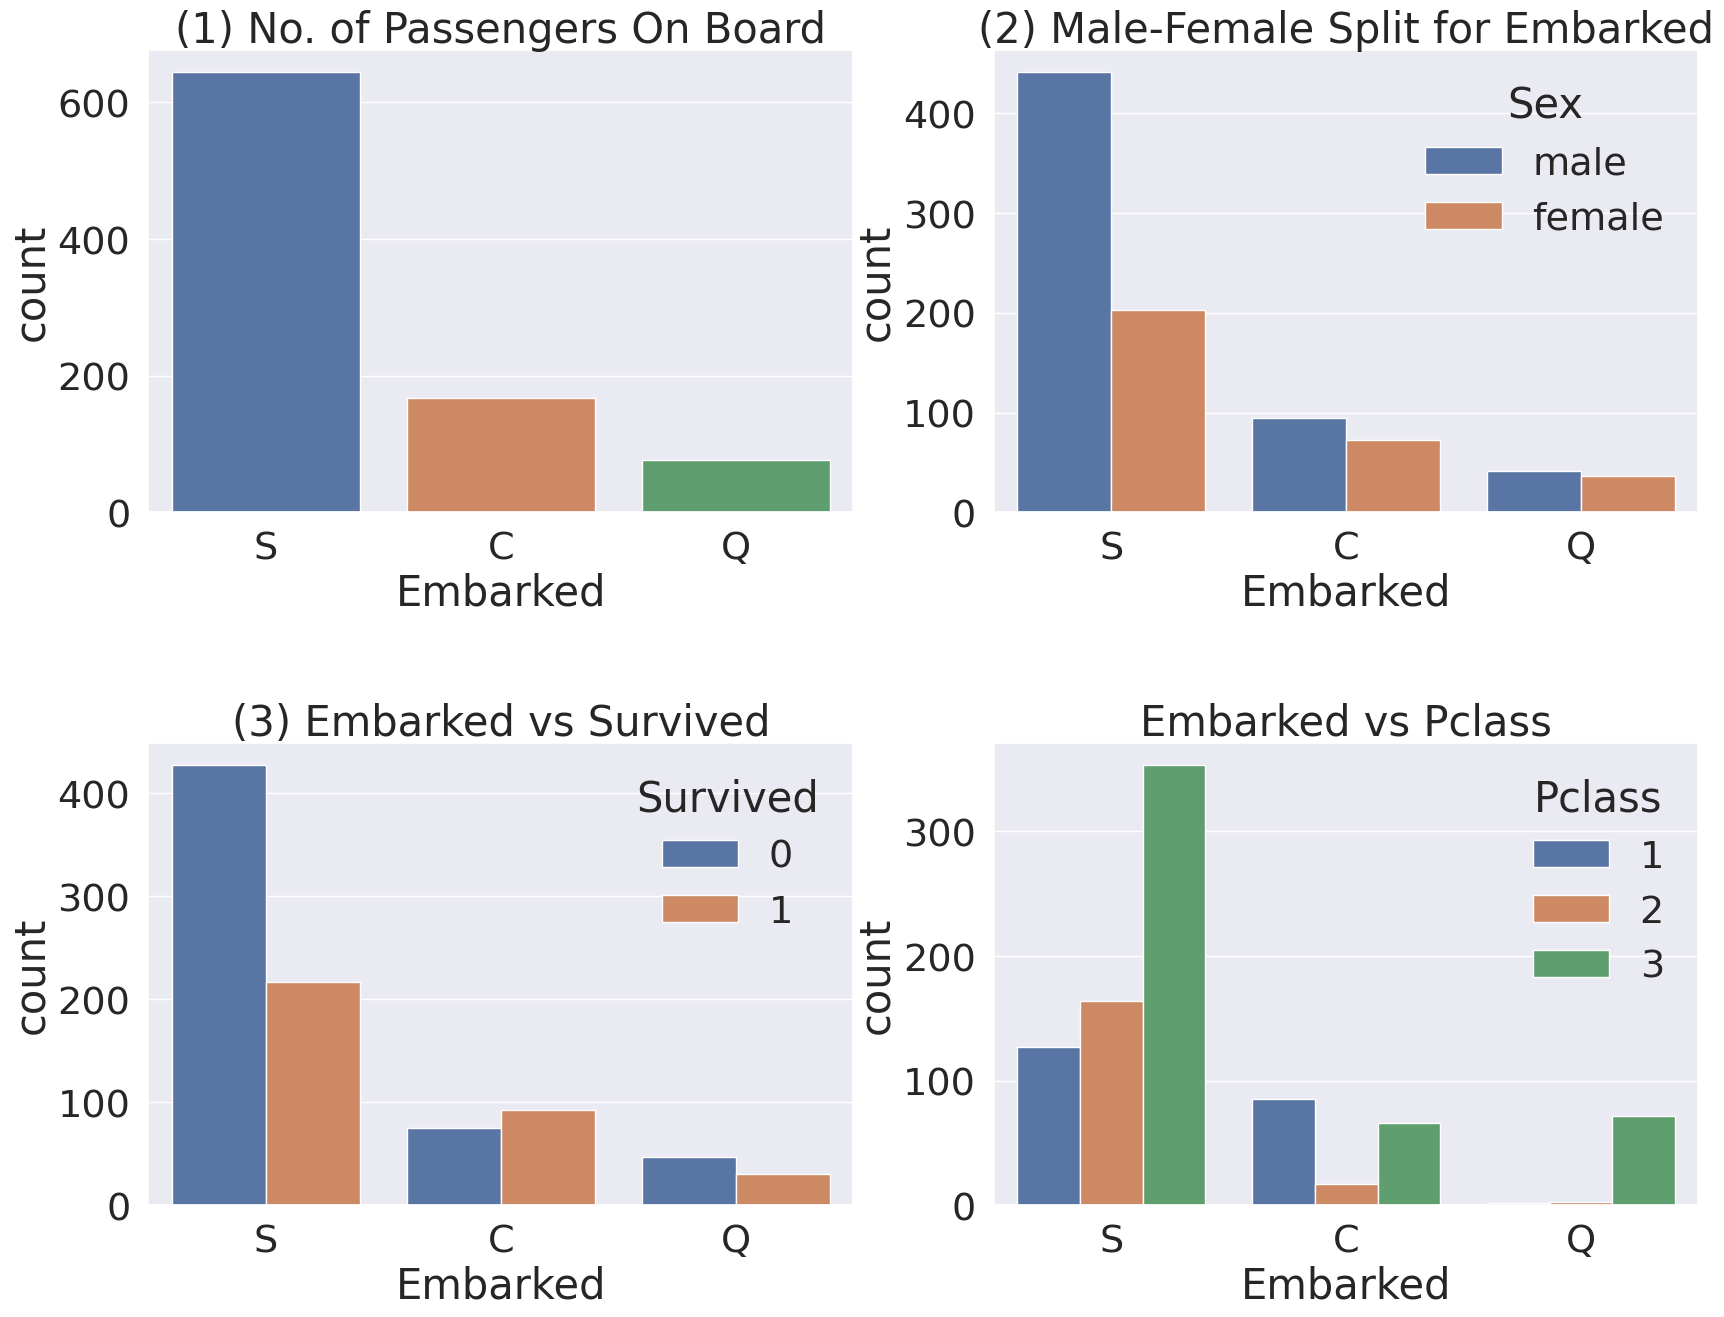

In [32]:
# 다른 feature로 split해서 살펴보기

f, ax = plt.subplots(2, 2, figsize=(20,15))

# (1) S에 가장 많은 사람이 탑승함
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers On Board')

# (2) C와 Q는 남녀 비율이 비슷하고 S는 남자가 더 많음
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

# (3) S의 사망율이 확연히 높음
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# (4) C에 높은 class 승객이 많아서 생존율이 높게 나온 것임. S는 3등석 승객이 많아 생존율이 낮음.
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## 2.7 Family - SibSp(형제,자매) + Parch(부모,자녀)

In [33]:
# SibSp와 Parch를 합해 FamilySize 속성을 만들기
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1 # 자기 자신 포함
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1 # 자기 자신 포함
df_train['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

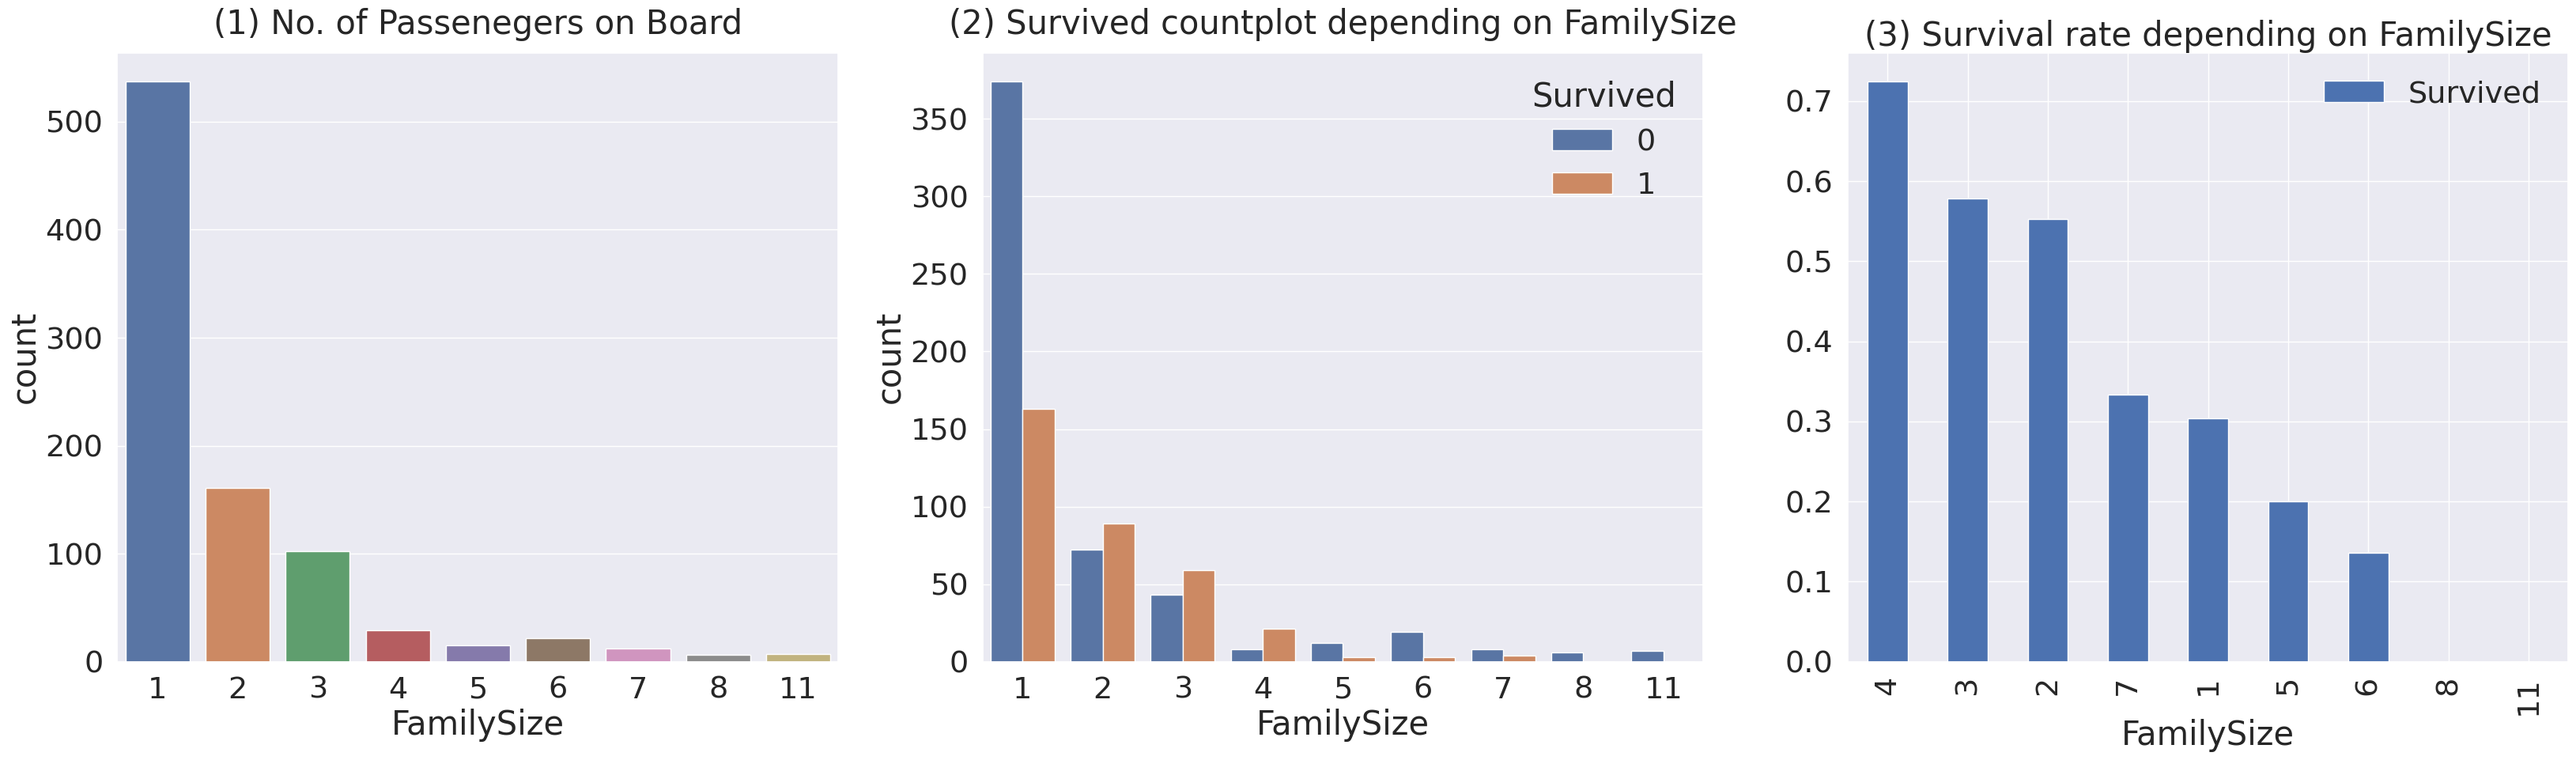

In [34]:
# Relationship between Family size and Survival

f, ax = plt.subplots(1, 3, figsize=(40,10))

# (1) 가족 크기는 1~11이고 대부분 1, 그 다음으로 2, 3, 4임
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passenegers on Board', y=1.02)

# (2) 가족 수가 아주 적거나 많을 때 생존율이 낮아짐
sns.countplot(x='FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# (3) 가족 수가 많아짐에 따라 생존율이 낮아짐
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survival rate depending on FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare: continuous data

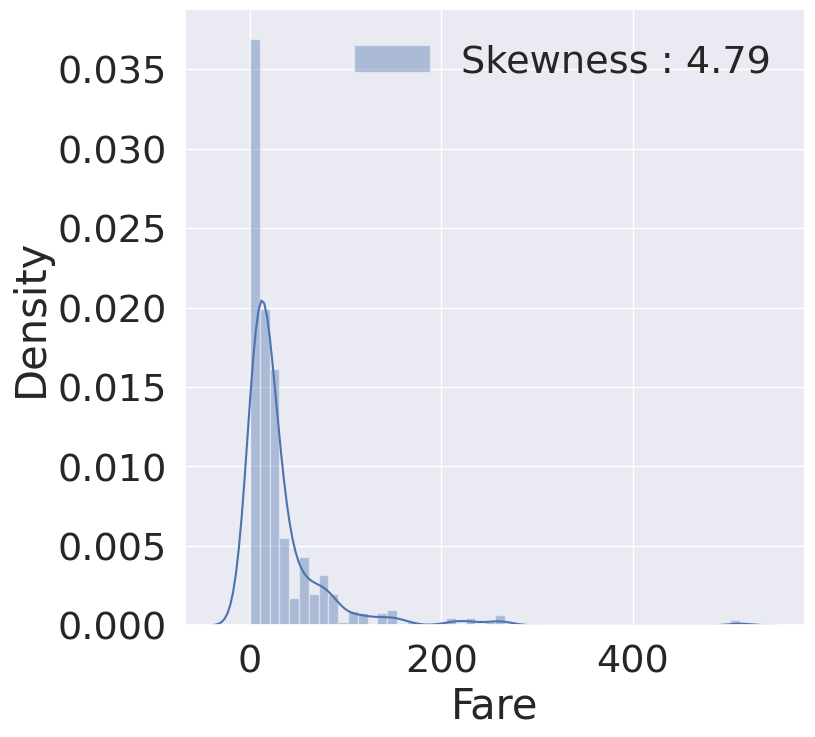

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# high skewness: 모델에 영향을 줄 수 있음 -> log 취함

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

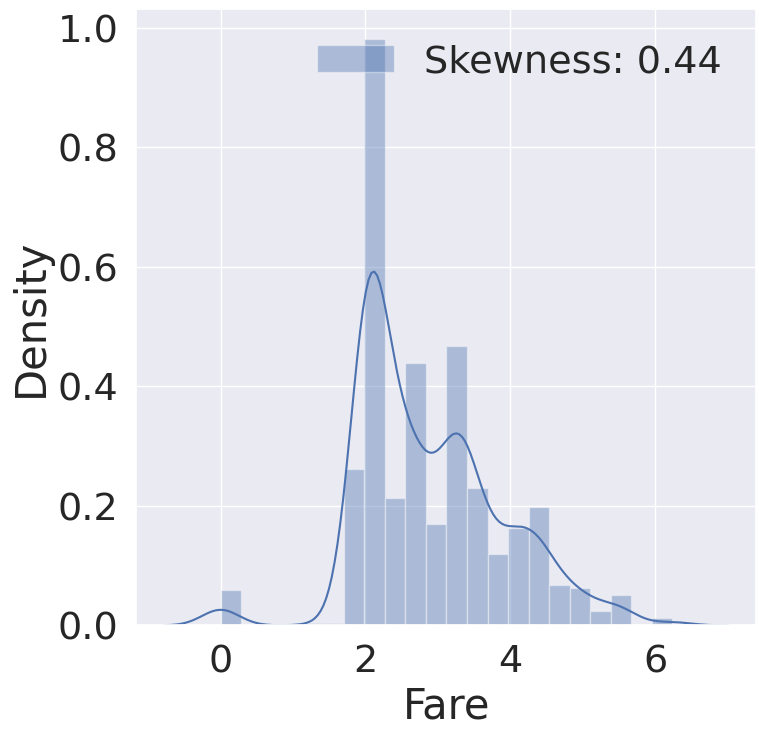

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

In [38]:
# NaN 비율이 77%로 높음
df_train['Cabin'].isnull().sum() / len(df_train['Cabin']) * 100

77.10437710437711

## 2.10 Ticket

In [39]:
df_train['Ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [40]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64